# Data and Sampling Distributions

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loans_income = pd.read_csv('../data/loans_income.csv')
sp500_px = pd.read_csv('../data/sp500_px.csv')

## Chapter Notes
- Sampling is required to reduce bias in a dataset. Predictive Models need to be developed and piloted with samples.

### Random Sampling and Bias

- Sample is a subset of data from a larger data-set. The larger data-set is called as the population.


- What is Stratified Sampling?
    -  Divinding the population into a strata and randomly sampling from each strata
    
    
- What is a strata?
    -  Stratification is the process of dividing members of the population into homogeneous subgroups before sampling.   
    -  The strata should be mutually exclusive: every element in the population must be assigned to only one stratum. 
    -  The strata should also be collectively exhaustive: no population element can be excluded.
    
    
- What is sample bias?
    -  A sample that misrepresents the population
    
    
- Statistical bias refers to the measurement or sampling errors that are systematic and produced by the measurement or sampling process.


- Why is Random Sampling important?
    -  ___Because Data Quality matters over Data Quantity___.
    -  Lets take the example of Literary Digest poll of 1936. During the great depression, many people in USA did not have money for the 'Literary Digest'.
    -  So when the Literary Digest conducted a poll predicting who will win (Landon (Republican) or Roosevelt (Democrat)), it predicted that Landon will win by a ___landslide___. 
    -  However it turned out that Roosevelt was the one that won the election.
    -  What happened here? 
        -  It turns out that Majority of the people who could afford the Literary Digest were of a generally ___higher___ socio-economic background than the larger population at hand. They owned telephones, automobiles and hence they occured on the marketers list in the first place. 
        -  This is called as a ___Sample Bias___ ,i.e, the sample was different in some meaningful "non-random" way from the larger population it was meant to represent.
        -  The term __non-random__ is important since hardly any sample, including random samples, will be exactly representative of the population.
        -  Sample Bias occurs when the difference is meaningful, and can be expected to continue for other samples drawn in the same way as the first.
        

- What is a Bias?
    - It refers to the measurement or sampling errors that are systematic and produced by the measurement or sampling process.
    
    
- To avoid bias, you need to understand data.


- For example when you are doing a customer survey for a Shopping mall, you need to define who a customer is.
    -  Do we select all customers whose purchase amount > 0?
    -  Do we include all past customers? 
    -  Do we include all refunds?
    -  Should we do internal test purchases?


- Next you need to define a sampling procedure. It maybe selecting 100 customers at random.


- In stratified sampling, the population is divided into strata and random sample is taken from each strata.


- What is the vast search effect?
    - Bias or non-reproducibility resulting from repeated data modeling, or modeling data with large numbers of predictable.
    

- What is selection bias?
    -  Refers to practice of selectively choosing data in a way that leads to a conclusion that is misleading or ephemeral.
    

- Regression to the Mean (Means to 'go-back'): Refers to the phenomenon of involving successive measurements on a given variable: extreme observations followed by more central ones. Example will be that children of tall men dont tend to be as tall.


### Sampling Distribution of a Statistic:


- The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution itself.





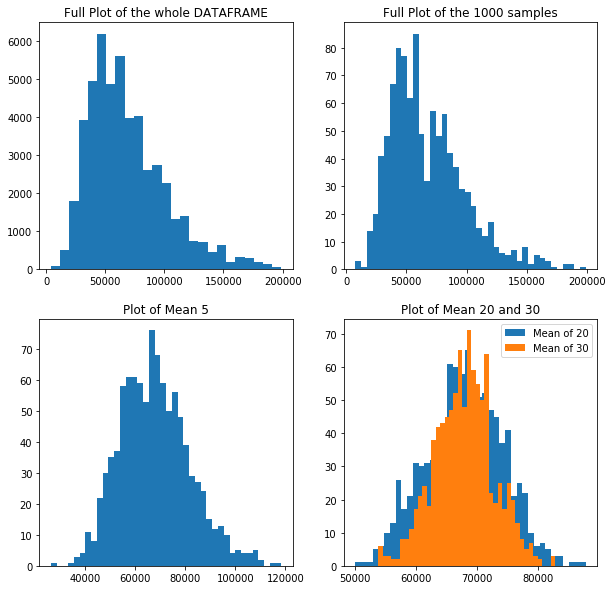

In [149]:
#Calculating a rolling mean:

#Take a 1000 Samples
samples = loans_income.sample(n=1000)

#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5 = sample_mean_5.dropna()

#mean of 20 numbers
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()

# mean of 30 numbers
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()

fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Mean 5')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Mean 20 and 30')
ax.legend()
plt.show()

plt.show()

# Central Limit Theorem
- Means drawn from multiple samples will resemble bell-shaped Normal curve even if the source population is not normally distributed.
- How to measure the variability of a sampling distribution?
    -  StandardError(SE) = s/sqrt(n) 
        - s = standard deviation
        - n = number of samples
    - AS the sameple size increases, the standard Error decreases.
    

In [176]:
bootstrap = np.random.choice(loans_income.x,size=1000,replace=False)

In [181]:
#Calculating a rolling mean:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())

Total Population STD :  32872.0353699
Total Population Mean :  68760.51844


In [183]:
#Calculating a rolling mean:
print('Bootstrap STD : ',np.std(bootstrap))
print('Bootstrap Mean : ',np.mean(bootstrap))

Bootstrap STD :  32760.4153979
Bootstrap Mean :  69120.742


###  Bootstrapping is used to improve the efficiency of Decision Trees. 
### DT's which utilize Bootstrapping are also called as Random Forests.

#### Bagging is the process of running multiple classification and regression trees, and then averaging their predictions. It generally performs better than a single tree.

## Confidence Interval
- Confidence level:
    - The percentage of confidence interval, contructed in the same way from the same population, expected to contain the statistic of interest.